In [ ]:
# get only jogging data from WISDM
import pandas as pd
column_names = ['user-id',
                    'activity',
                    'timestamp',
                    'x-axis',
                    'y-axis',
                    'z-axis']

file_path = '../NHANES/WISDM_ar_v1.1_raw.txt'
df_WISDM = pd.read_csv(file_path,
                     header=None,        # column names are passed explicitly so header = none
                     names = column_names,
                     lineterminator = ';',        #lineterminator: break file into lines
                     skiprows = [343419])

# Select rows where a specific column has a certain value
selected_rows = df_WISDM[df_WISDM['activity'] == 'Jogging']

# create new df that contain x,y,z,activity as columns
new_df_WISDM = selected_rows[['x-axis', 'y-axis', 'z-axis','activity']]

def show_basic_dataframe_info(dataframe):
    print(dataframe.shape)
    
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))     # .shape[1] = output is no. of column. 
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))      # .shape[0] = output is no. of rows
                                                                                

# show data
show_basic_dataframe_info(new_df_WISDM)
new_df_WISDM.head(20) 

#save the new WISDM into a file
new_df_WISDM.to_csv('WISDM raw data (jogging only).txt', index=False, sep=',', header=False)

# add jogging data from WISDM dataset to UCI dataset
# Read the contents of the first text file
with open('../NHANES/WISDM raw data (jogging only).txt', 'r') as WISDM_file:
    content1 = WISDM_file.read()

# Read the contents of the second text file
with open('../NHANES/UCI_processed_data (20 Hz).txt', 'r') as UCI_file:
    content2 = UCI_file.read()

# Combine the contents of both files
combined_content = content1 + content2

# Write the combined content to a new file
with open('UCI_WISDM(jog)_combined.txt', 'w') as combined_file:
    combined_file.write(combined_content)

In [2]:
'''Combine Wisdm (all) + UCI (laying only)'''
import pandas as pd
column_names = ['user-id',
                    'activity',
                    'timestamp',
                    'x-axis',
                    'y-axis',
                    'z-axis']

df_WISDM = pd.read_csv('../Data/WISDM_ar_v1.1_raw.txt',
                     header=None,        # column names are passed explicitly so header = none
                     names = column_names,
                     lineterminator = ';',        #lineterminator: break file into lines
                     skiprows = [343419])

# Pick only selected columns that contain x,y,z,activity 
df_WISDM = df_WISDM[['user-id', 'x-axis', 'y-axis', 'z-axis','activity']]

# standardized since two datasets have different ranges 
def max_scale_round(df):
    pd.options.mode.chained_assignment = None  # allow to modify the DataFrame or Series using chained indexing without generating a warning. default='warn', none will ignore the warning
    df['x-axis'] = df['x-axis'] / df['x-axis'].max()
    df['y-axis'] = df['y-axis'] / df['y-axis'].max()
    df['z-axis'] = df['z-axis'] / df['z-axis'].max()
    # Round numbers
    df = df.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})      #apply rounding to 4 decimal places for the three features (x,y,z) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html 
    return df

df_WISDM = max_scale_round(df_WISDM)

''' add UCI (laying)'''
# load in UCI processed dataset
UCI_column_names = ['x-axis', 'y-axis', 'z-axis','activity']
df_UCI = pd.read_csv('../Data/UCI_processed_data (20 Hz).txt',
                     delimiter= ',',
                     header= None,                 # column names are passed explicitly so header = none
                     names=UCI_column_names,          #List of column names to use
                     lineterminator = '\n')        #lineterminator: break file into lines
# Select rows where a specific column has a certain value
df_UCI_laying = df_UCI[df_UCI['activity'] == 'Laying']

# Add a new column as the first column
df_UCI_laying.insert(0, 'user-id', [37] * len(df_UCI_laying))

# standardized since two datasets have different ranges 
def max_scale_round(df):
    pd.options.mode.chained_assignment = None  # allow to modify the DataFrame or Series using chained indexing without generating a warning. default='warn', none will ignore the warning
    df['x-axis'] = df['x-axis'] / df['x-axis'].max()
    df['y-axis'] = df['y-axis'] / df['y-axis'].max()
    df['z-axis'] = df['z-axis'] / df['z-axis'].max()
    # Round numbers
    df = df.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})      #apply rounding to 4 decimal places for the three features (x,y,z) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html 
    return df

df_UCI_laying = max_scale_round(df_UCI_laying)

#print(df_UCI_laying.head(10))
#join two dataframe together
df_combined = pd.concat([df_WISDM, df_UCI_laying], axis=0)

def show_basic_dataframe_info(dataframe):
    print(dataframe.shape)
    
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))     # .shape[1] = output is no. of column. 
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))      # .shape[0] = output is no. of rows
                                                                                

# show data
show_basic_dataframe_info(df_combined)
df_combined.tail(20) 

(1152954, 5)
Number of columns in the dataframe: 5
Number of rows in the dataframe: 1152954



,user-id,x-axis,y-axis,z-axis,activity
296409,37,0.0759,0.4982,0.5534,Laying
296410,37,0.0924,0.5026,0.5356,Laying
296411,37,0.0759,0.5009,0.5392,Laying
296412,37,0.0792,0.5000,0.5546,Laying
296413,37,0.0858,0.4991,0.5451,Laying
296414,37,0.0726,0.5000,0.5475,Laying
296415,37,0.0792,0.5000,0.5439,Laying
296416,37,0.0891,0.4965,0.5534,Laying
296417,37,0.0759,0.5018,0.5475,Laying
296418,37,0.0759,0.5018,0.5428,Laying


NameError: name 'plt' is not defined

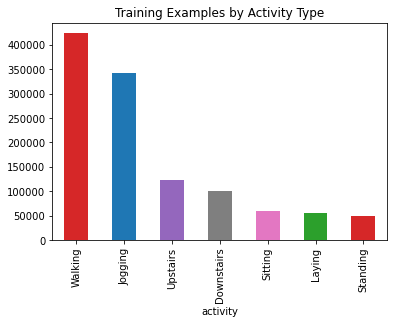

In [3]:
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:gray', 'tab:pink', 'tab:green'] # change bar color
df_combined['activity'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type',
                                   color = bar_colors)

plt.show()

In [4]:
# Save the DataFrame to a text file
df_combined.to_csv('Raw_WISDM_UCI(laying)_updated.txt', index=False, sep=',', header = False)    